<p style="text-align:center;color:red">
    <font size="+3.5">TP OPTIMISATION</font>
</p>
<p><br></p>

---
<p><br></p>
<div style="float: left"><B><font size="+1">Laurent Sekonian</font></B></div>
<div style="float: right"><B><font size="+1">Antoine Gruson</font></B></div>
<div style="margin: 0 auto; width: 140px;"><B><font size="+1">CentraleSupélec</font></B></div>
<p><br></p>
<center>
    <img SRC="logoCentrale.png" width="70" height="60">
</center>
<p><br></p>
<p style="text-align:center;">
    <font size="+1"><B>Encadrant : M. Laurent Le Brusquet</B></font>
</p>
<p><br></p>

---

<div id="toc_container">
    <p class="toc_title"> <font size="+1"><B>Sommaire</B></font></p>
<ul class="toc_list">
  <li><a href="#1">1 - Optimisation continue sous contraintes</a>
  <ul>
    <li><a href="#1.1">Comparaison primale duale </a></li>
    <ul>
        <li><a href="#1.1.1">1.1 Résolution du problème primal </a></li>
        <li><a href="#1.1.2">1.2 Résolution du problème dual </a></li>
    </ul>
  </ul>
</li>
<li><a href="#2">2 - Optimisation discrète</a></li>
  <ul>
    <li><a href="#2.1">2.1 Rangement d'objets </a></li>
    <li><a href="#2.2">2.2 Communication entre espions </a></li>
    <li><a href="#2.3">2.3 Approvisionnement d'un chantier </a></li>
  </ul>
<li><a href="#3">3 - Optimisation multiobjectif : dimmensionnement d'une poutre</a></li>
  <ul>
    <li><a href="#3.1">2.1 Méthode Gloutonne </a></li>
    <li><a href="#3.2">2.2 Méthode Mono-Objectif - Critère agrégé </a></li>
    <li><a href="#3.3">2.3 Méthode Métaheuristique </a></li>
  </ul>
</ul>
</div>


<p><br></p>
<p id ="1" style="text-align:center;color:red;">
    <B><font size="+2.5">1 - Optimisation continue sous contraintes</font></B>
</p>

<p id ="1.1" style="text-align:center;">
    <B><font size="+1.5">Comparaison primal duale</font></B>
</p>
<p><br></p>
Dans cette partie, nous allons comparer les résolutions des problèmes primal et dual, en considérant le problème d'optimisation suivant :  
Soit $N \in E, N \geq 2$. Minimiser la fonction $f$ définie sur $\mathbb{R}^{N}$ par :  

$$(x^{(i)})_{1 \leq i \leq N} \longmapsto \sum_{i=1}^{N}(exp(x^{(i)}) + \frac{i}{N}x^{(i)}),$$

Sous la contrainte : $\sum_{i=1}^{N}x^{(i)} \geq 1$.

Nous allons donc : 
- Résoudre directement le problème primal par une méthode de pénalisation (méthode de points intérieurs),
- Reformuler le problème à l'aide des multiplicateurs de Lagrange puis le résoudre.

Dans le deuxième point, nous effectuerons une approche analytique afin de sa ramener à un problème d'optimisation scalaire sous contrainte de bornes.

Nous utiliserons donc ici le package **cvxpy**, qui nous donne des résultats identiques à ce qu'on peut avoir sur Matlab. De plus, **cvxpy** est capable de nous donner directement la valeur $\lambda$ du problème dual (pénalisation de la contrainte) lors de l'implémentation du problème primal. Mais nous ne nous arrêterons pas à cet astuce. 

<p id ="1.1.1" style="text-align:left;">
    <B><font size="+1.5">1.1 - Résolution du problème primal</font></B>
</p>

La taille de l'échantillon $N$ sera de $10$, $100$, $1000$. Pour la résolution de ce problème, nous indiquerons les résultats suivants pour chaque $N$ : 
- Valeur optimale de la fonction
- Temps d'exécution
- Tracé du $x$ optimal

Notre fonction objective est implémentée dans un bloc distinct ci-dessous : 


In [31]:
# Chargement des packages necessaires
#!pip install --upgrade cvxpy a decommenter si la dernière version de cvxpy n'est pas installée
import numpy as np
# from scipy.optimize import minimize, linprog, LinearConstraint, fminbound
import matplotlib.pyplot as plt
import time
import cvxpy as cp

In [14]:
# Fonction objective
def f(x,N):
    seq = np.array([i for i in range(1,N+1)])
    return sum(cp.exp(x))+ 1/N*seq @ x

Pour $N=10$ :

In [3]:
N = 10
x = cp.Variable(N)
start = time.time()
prob = cp.Problem(cp.Minimize(f(x,N)), [sum(x) >= 1]) # Définition du problème avec notre contrainte
res = prob.solve()
end = time.time()
print("La valeur de la fonction objetctive est :", round(res,5))
print("Avec un temps d'exécution de {}s".format(round(end-start,3)))

La valeur de la fonction objetctive est : 11.22729
Avec un temps d'exécution de 0.121s


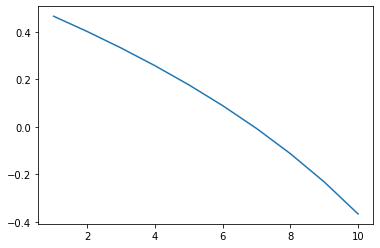

In [4]:
# Tracé du x optimal pour N = 10
axis = [i for i in range(1,N+1)]
plt.plot(axis, x.value)

Le package cvxpy permet également d'avoir la valeur $\lambda$ du problème dual (pénalisation de la contrainte)

In [148]:
print("La valeur lambda du problème dual correspondant est : \n", prob.constraints[0].dual_value)

La valeur lambda du problème dual correspondant est : 
 1.692852980876997


Pour $N = 100$ :

In [149]:
N = 100
x = cp.Variable(N)
start = time.time()
prob = cp.Problem(cp.Minimize(f(x,N)), [sum(x) >= 1])
res = prob.solve()
end = time.time()
print("La valeur de la fonction objetctive est :", round(res,5))
print("Avec un temps d'exécution de {}s".format(round(end-start,3)))
print("La valeur du problème dual correspondant est λ = ", prob.constraints[0].dual_value)

La valeur de la fonction objetctive est : 97.36795
Avec un temps d'exécution de 0.935s
La valeur du problème dual correspondant est λ =  1.5568257008813722


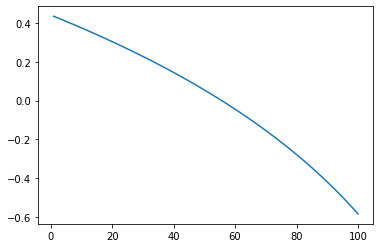

In [150]:
# Tracé du x optimal pour N = 100
axis = [i for i in range(1,N+1)]
plt.plot(axis, x.value)

Pour $N=1000$ : 

In [151]:
N = 1000
x = cp.Variable(N)
start = time.time()
prob = cp.Problem(cp.Minimize(f(x,N)), [sum(x) >= 1])
res = prob.solve()
end = time.time()
print("La valeur de la fonction objetctive est :", round(res,5))
print("Avec un temps d'exécution de {}s".format(round(end-start,3)))
print("La valeur du problème dual correspondant est λ = ", prob.constraints[0].dual_value)

La valeur de la fonction objetctive est : 959.69826
Avec un temps d'exécution de 191.653s
La valeur du problème dual correspondant est λ =  1.5436685441785039


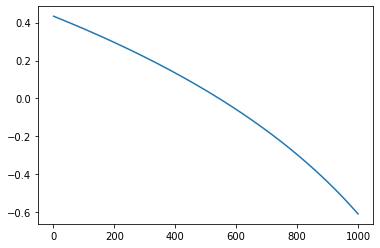

In [152]:
# Tracé du x optimal pour N = 1000
axis = [i for i in range(1,N+1)]
plt.plot(axis, x.value)

On remarque que pour $N=1000$, le temps d'exécution est extrémement plus long que sur Matlab, de moins d'1s pour Matlab à 223s ici, même si la fonction est légèrement mieux minimisée :  
$f_{Matlab}(x^{*}) = 959.848$ et $f_{Python}(x^{*}) = 959.698$.

<p><br></p>
<p id ="1.1.2" style="text-align:left;">
    <B><font size="+1.5">1.2 - Résolution du problème dual</font></B>
</p>

Nous allons désormais résoudre le problème dual. Pour cela, nous allons déjà démontrer l'existence d'un minimiseur, son unicité ainsi que l'existence d'un point selle.

Avant tout, introduisons notre contrainte :  $h(x) = 1 - \sum_{i=1}^{N}x^{(i)} \leq 0$.

Notre fonction $f(x)$ est strictement convexe. De plus, nous pouvons voir que lorsque $||x|| \to \infty$, $f(x) \to \infty$, $f$est donc coercive. 
L'ensemble $C=${ $x \in \mathbb{R}^{N}$  tq $h(x) \leq 0$} est un ensemble convexe, $dom f = \mathbb{R}^{N}$ et $C \bigcap domf \ne \oslash$, donc le minimiseur existe et est unique. 

Condition de Slater : $x=1_{N.1} \in int(domf)$ et $h(x) < 0$.

Donc  $\hat{x}$ est un minimiseur si et seulement si $\exists \hat{\lambda}$ tq $(\hat{x},\hat{\lambda})$ est un point selle. 

**a)** Exprimons le lagrangien $\mathcal{L}(x,\lambda)$ et la fonction duale $\underline{\mathcal{L}}(\lambda)$ :  

$$\mathcal{L}(x,\lambda) = \sum_{i=1}^{N} (exp(x^{(i)}) + p_{i}x^{(i)}) + \lambda(1 - \sum_{i=1}^{N}x^{(i)})$, avec $p_{i} = \frac{i}{N}$$.

Notre fonction de Lagrange duale est telle que $\underline{\mathcal{L}}(\lambda) = inf_{x\in\mathbb{R}^{N}}\mathcal{L}(x,\lambda)$. Nous allons donc dériver le lagrangien en fonction de $x$ afin de trouver les $x$ tq $\frac{\partial\mathcal{L}}{\partial x}(x,\lambda) = 0$ :  

$$\frac{\partial\mathcal{L}}{\partial x}(x,\lambda) = 0 \Rightarrow \forall i, e^{x^{(i)}} + p_{i} - \lambda = 0,$$ Ce qui nous donne : 
$$\hat{x} = argmin_{x}\mathcal{L}(x,\lambda) = [log(\lambda - p_{1}),..., log(\lambda - p_{N})]^{T}$$. 

**b)** Enfin, on obtient après simplifications :  

$$\underline{\mathcal{L}}(\lambda) = \sum_{i=1}^{N}[(\lambda - p_{i}) + (p_{i} - \lambda)log(\lambda - p_{i})] + \lambda,$$ qui est une fonction concave, à maximiser, dépendant de la variable $\lambda \geq 0$, nous avons donc notre problème dual à une variable scalaire sous une contrainte de borne.

**c)** L'algorithme d'optimisation permettant de maximiser la fonction duale est présenté dans les blocs ci-dessous, pour $N = 10, 100, 1000$ : 

In [153]:
# Fonction duale objective
def fdual(lmbda,N):
    seq = np.array([i for i in range(1,N+1)])/N
    return (-sum(lmbda-seq) - sum(cp.entr(lmbda - seq)) - lmbda)

Pour $N=10$ : 

In [154]:
N = 10
lmbda = cp.Variable()
start = time.time()
prob = cp.Problem(cp.Minimize(fdual(lmbda,N)), [lmbda >= 1.000001, lmbda <= 1000])
res = prob.solve()
end = time.time()
print("La valeur de la fonction objective est :", round(res,5))
print("Avec un temps d'exécution de {}s".format(round(end-start,3)))
print("lambda est de :", lmbda.value)

La valeur de la fonction objetctive est : -11.22729
Avec un temps d'exécution de 0.173s
1.6928530538897193


Pour $N=100$ : 

In [155]:
N = 100
lmbda = cp.Variable()
start = time.time()
prob = cp.Problem(cp.Minimize(fdual(lmbda,N)), [lmbda >= 1.000001, lmbda <= 1000])
res = prob.solve()
end = time.time()
print("La valeur de la fonction objective est :", round(res,5))
print("Avec un temps d'exécution de {}s".format(round(end-start,3)))
print("lambda est de :", lmbda.value)

La valeur de la fonction objetctive est : -97.36795
Avec un temps d'exécution de 0.906s
1.5568256989080496


Pour $N = 1000$ :

In [156]:
N = 1000
lmbda = cp.Variable()
start = time.time()
prob = cp.Problem(cp.Minimize(fdual(lmbda,N)), [lmbda >= 1.000001, lmbda <= 1000])
res = prob.solve()
end = time.time()
print("La valeur de la fonction objective est :", round(res,5))
print("Avec un temps d'exécution de {}s".format(round(end-start,3)))
print("lambda est de :", lmbda.value)

La valeur de la fonction objetctive est : -959.69826
Avec un temps d'exécution de 206.006s
1.5436685149321614


**d)** Nous pouvons donc voir que les valeurs des fonctions objectives minimisées en valeur absolues sont égales, ce qui conforte nos résultats. D'un point de vue temps d'exécution, il est comparable pour les problèmes primal et dual, et dépend surtout de la valeur de N. Biensûr, plus N augmente, plus le temps d'éxécution augmente.

<p><br></p>
<p id="2" style="text-align:center;color:red">
    <B><font size="+2.5">2 - Optimisation discrète</font></B>
</p>

<p id="2.1" style="text-align:center">
    <B><font size="+1">2.1 Rangement d'objets</font></B>
</p>
<p><br></p>
Dans cette partie, nous allons considérer le problème suivant : ranger $N$ objets éparpillés sur le sol dans $N$ boîtes alignées sur le sol.  
Les boites sont alignées sur l'axe des $x$ et le tout est compris dans un plan $(x,y)$.  
Les contraintes sont les suivantes : 
- Un seul objet par boîte
- Tous les objets doivent être rangés
- Minimiser la distance euclidienne objets/boîtes (coût)

La solution sera un vecteur $x$ à valeurs binaires, $x \in \mathbb{R}^{N^{2}x1}$ tel que $x_{i,j} = 1$ si l'objet $j$ est dans la boîte $i$.   

### Question 1) 
La traduction mathématique de la première contrainte est la suivante :  

a) $\forall i, \sum_{j=1}^{N}x_{i,j} = 1$, et b) $\forall j, \sum_{i=1}^{N}x_{i,j} = 1$.

### Question 2)

Nous allons donc coder et résoudre ce problème de **programation linéaire en nombre entier (PLNE)**, que l'on peut voir mathématiquement de la manière suivante : $$min\sum_{i,j} ||O_{j}-B_{i}||x_{i,j}$$
Il est important de noter qu'afin de satisfaire les conditions de résolutions, la contrainte doit être telle que $Aeq * x=beq$. La matrice $Aeq$ doit donc être implémentée de sorte que nos deux contraintes ci-dessus soient vérifiées. 

Nous pouvons, pour cela, remarquer deux produits de kronecker, un pour chaque somme. 

En effet, la contrainte a) donne : $(\mathbb{I}_{N} \otimes \boldsymbol{1}_{N}) * \boldsymbol{x} = \boldsymbol{1}_{N}^{T}$, avec $\mathbb{I}_{N}$ la matrice identitée de taille N et $\boldsymbol{1}_{N} = (1,...,1)$.

De part le même raisonnement, la contrainte b) donne : $(\boldsymbol{1}_{N} \otimes \mathbb{I}_{N})  * \boldsymbol{x} = \boldsymbol{1}_{N}^{T}$.

Nous proposons ci-dessous la résolution de ce problème avec le solver *GLPK_MI* du package **cvxpy**, solveur utilisé lors de la réalisé de problème d'optimisation en *nombre entiers* et "*mixed-integer*".

Le vecteur solution est bien de la taille souhaitée, $\mathbb{R}^{N^{2}x1}$, mais nous l'afficherons sous forme de matrice par soucis de clarté.  
De plus, afin de voir notre solution de manière bien plus parlante, des figures correspondants à la résolution des questions seront présentées.

La valeur de la fonction objective est : 15.378


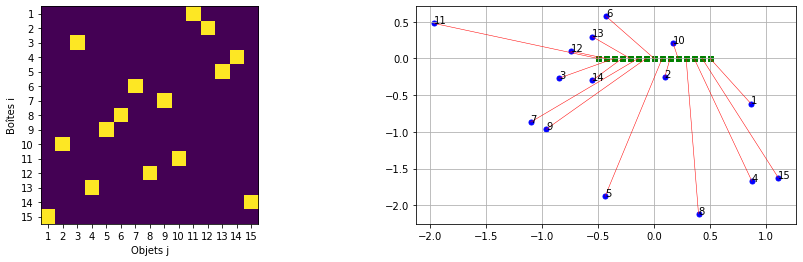

In [1]:
# Chargement des packages necessaires
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

O = np.loadtxt("Données_pour_le_TP/Ranger_objets/PositionObjets.txt",skiprows=1)
C = np.loadtxt("Données_pour_le_TP/Ranger_objets/PositionCasiers.txt",skiprows=1)
N = O.shape[0]
N=15
# On calcule la distance
distance = np.zeros((N*N,1))
k = 0
for i in range(N):
    for j in range(N):
        distance[k] = np.linalg.norm(O[j, :]-C[i, :])
        k += 1

# Contrainte principale
Aeq = np.concatenate((np.kron(np.eye(N), np.ones(N)), np.kron(np.ones(N), np.eye(N))))
beq = np.ones((2*N,1)) # (30,1)

# Résolution problème via cvxpy
x = cp.Variable((N*N,1), boolean=True)
prob = cp.Problem(cp.Minimize(sum(distance.T@x)), constraints=[Aeq@x == beq.T])
fval = prob.solve()
print("La valeur de la fonction objective est :", round(fval,3))

# On affiche xmat par soucis de clarté
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
plt.subplot(1, 2, 1)
xmat = x.value.reshape((N,N))
plt.xlabel("Objets j")
plt.ylabel("Boîtes i")
centers = [1,N,N,1]
dx, = np.diff(centers[:2])/(xmat.shape[1]-1)
dy, = -np.diff(centers[2:])/(xmat.shape[0]-1)
extent = [centers[0]-dx/2, centers[1]+dx/2, centers[2]+dy/2, centers[3]-dy/2]
plt.imshow(xmat, extent=extent)
plt.xticks(np.arange(centers[0], centers[1]+dx, dx))
plt.yticks(np.arange(centers[3], centers[2]+dy, dy))

# On affiche le plan (x,y)
plt.subplot(1, 2, 2)
plt.scatter(C[:, 0], C[:, 1], s=25, marker="s", color="green")
plt.scatter(O[:, 0], O[:, 1], s=25, marker="o", color="blue")
plt.grid()
for i, val in enumerate(O):
    plt.annotate(i+1, (val[0], val[1]))

for i in range(0, xmat.shape[0]):
    for j in range(0, xmat.shape[1]):
        if xmat[i][j] == 1:
            plt.plot([O[j, 0], C[i, 0]], [O[j, 1], C[i, 1]], linewidth=0.5, color="red")

Nous avons donc $f_{opt} = 15,378$.

### Question 3)
Désormais, nous allons modifier la matrice $Aeq$ afin que la contrainte suivante soit vérifiée : l'objet 1 doit se situer dans la boîte située juste à gauche de la boîte contenant l'objet 2.

Pour cette contrainte, nous avons trouvé deux solution. Celle minimisant le plus la somme des distances sera gardée dans le code. 

Contrainte a) :  $\forall i, x_{i,1} + \sum_{k>0}^{N}x_{i+k,1} = \sum_{k>0}^{N}x_{i+k,2}$. Cette contrainte nous donne $f_{opt} = 15,565$.

Contrainte b) :  $\forall i, x_{i,2} + \sum_{k=0}^{N}x_{i+k,1} = 1$. Celle-ci nous donne $f_{opt} = 15,689$.

Avec la contraine b), nous avions l'objet 1 rangé juste avant l'objet 2, mais dans les deux dernières boîtes. Avec la a), l'objet 1 est rangé juste avant le 2 et l'objet 2 ne "change" pas de boîte (comparé à la question précédente). 

Nous allons donc garder la contrainte a) pour la suite de l'exercice. Voici le code l'implémentant.

La valeur de la fonction objective est : 15.565


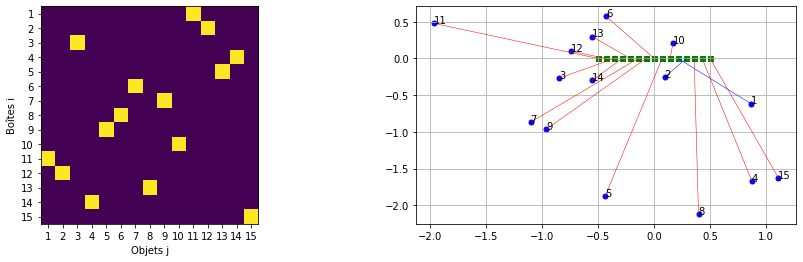

In [3]:
# Contrainte q3 a)
# u = np.zeros(N); u[0] = 1 ; v = np.zeros(N); v[1] = 1 ; constraintq3 = kron(triu(ones(N)),u) + kron(eye(N),v)

# Contrainte q3 b)
u = np.zeros(N); u[0] = 1
v = np.zeros(N); v[0] = 1; v[1] = -1
constraintq3 = np.kron(np.eye(N),u) + np.kron(np.triu(np.ones(N),1),v)
resq3 = np.zeros((N,1))

# Résolution problème via cvxpy
x = cp.Variable((N*N,1), boolean=True)
prob = cp.Problem(cp.Minimize(sum(distance.T@x)), constraints=[Aeq@x == beq.T, 
                                                               constraintq3@x == resq3])
fval = prob.solve()
print("La valeur de la fonction objective est :", round(fval,3))


# On affiche xmat par soucis de clarté
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
plt.subplot(1, 2, 1)
xmat = x.value.reshape((N,N))
plt.xlabel("Objets j")
plt.ylabel("Boîtes i")
centers = [1,N,N,1]
dx, = np.diff(centers[:2])/(xmat.shape[1]-1)
dy, = -np.diff(centers[2:])/(xmat.shape[0]-1)
extent = [centers[0]-dx/2, centers[1]+dx/2, centers[2]+dy/2, centers[3]-dy/2]
plt.imshow(xmat, extent=extent)
plt.xticks(np.arange(centers[0], centers[1]+dx, dx))
plt.yticks(np.arange(centers[3], centers[2]+dy, dy))

# On affiche le plan (x,y)
plt.subplot(1, 2, 2)
plt.scatter(C[:, 0], C[:, 1], s=25, marker="s", color="green")
plt.scatter(O[:, 0], O[:, 1], s=25, marker="o", color="blue")
plt.grid()
for i, val in enumerate(O):
    plt.annotate(i+1, (val[0], val[1]))

for i in range(0, xmat.shape[0]):
    for j in range(0, xmat.shape[1]):
        if xmat[i][j] == 1:
            if j == 0 or j == 1:
                plt.plot([O[j, 0], C[i, 0]], [O[j, 1], C[i, 1]], linewidth=0.5, color="blue")
            else:    
                plt.plot([O[j, 0], C[i, 0]], [O[j, 1], C[i, 1]], linewidth=0.5, color="red")

Nous avons donc $f_{opt} = 15,565$ suite à la contrainte $\forall i, x_{i,1} + \sum_{k>0}^{N}x_{i+k,1} = \sum_{k>0}^{N}x_{i+k,2}$.

### Question 4)

Les équations suivantes : $\forall i, x_{i,3} + \sum_{k>0}^{N}x_{i+k,4} \leq 1$, traduisent le fait que l'objet 4 sera forcément avant de l'objet 3. Il ne pourra pas être dans une boite située apès la boîte contenant l'objet 3. 

Nous allons donc ajouter la contrainte suivante à notre problème. 

La valeur de la fonction objective est : 15.901


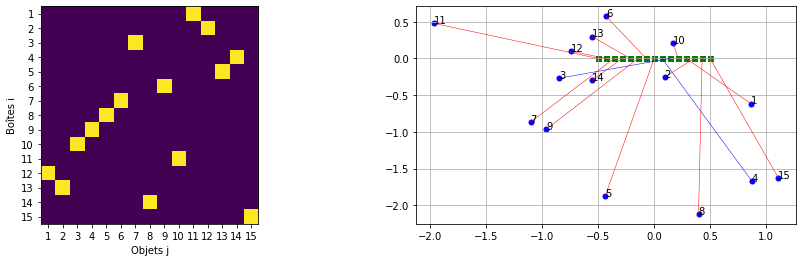

In [4]:
# Contraine q4
u = np.zeros(N); u[2] = 1
v = np.zeros(N); v[3] = 1
constraintq4 = np.kron(np.eye(N),u) + np.kron(np.triu(np.ones(N),1),v)
resq4 = np.ones((N,1))

# Résolution problème via cvxpy
x = cp.Variable((N*N,1), boolean=True)
prob = cp.Problem(cp.Minimize(sum(distance.T@x)), constraints=[Aeq@x == beq, 
                                                               constraintq3@x == resq3, 
                                                               constraintq4@x <= resq4])
fval = prob.solve()
print("La valeur de la fonction objective est :", round(fval,3))

# On affiche xmat par soucis de clarté
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
plt.subplot(1, 2, 1)
xmat = x.value.reshape((N,N))
plt.xlabel("Objets j")
plt.ylabel("Boîtes i")
centers = [1,N,N,1]
dx, = np.diff(centers[:2])/(xmat.shape[1]-1)
dy, = -np.diff(centers[2:])/(xmat.shape[0]-1)
extent = [centers[0]-dx/2, centers[1]+dx/2, centers[2]+dy/2, centers[3]-dy/2]
plt.imshow(xmat, extent=extent)
plt.xticks(np.arange(centers[0], centers[1]+dx, dx))
plt.yticks(np.arange(centers[3], centers[2]+dy, dy))

# On affiche le plan (x,y)
plt.subplot(1, 2, 2)
plt.scatter(C[:, 0], C[:, 1], s=25, marker="s", color="green")
plt.scatter(O[:, 0], O[:, 1], s=25, marker="o", color="blue")
plt.grid()
for i, val in enumerate(O):
    plt.annotate(i+1, (val[0], val[1]))

for i in range(0, xmat.shape[0]):
    for j in range(0, xmat.shape[1]):
        if xmat[i][j] == 1:
            if j == 2 or j == 3:
                plt.plot([O[j, 0], C[i, 0]], [O[j, 1], C[i, 1]], linewidth=0.5, color="blue")
            else:    
                plt.plot([O[j, 0], C[i, 0]], [O[j, 1], C[i, 1]], linewidth=0.5, color="red")

Nous avons donc $f_{opt} = 15,901$ suite à la contrainte $\forall i, x_{i,3} + \sum_{k>0}^{N}x_{i+k,4} \leq 1$.

### Question 5)

Afin de pallier au fait que l'objet 7 doit toujours être rangé à côté de l'objet 9, nous obtenons les équations suivantes : $\forall i, x_{i,9} = \sum_{k=-1,i+k>0}^{1,i+k<N}x_{i+k,7}$. 

Nous allons donc ajouter la contrainte suivante à notre problème. 

La valeur de la fonction objective est : 15.92039


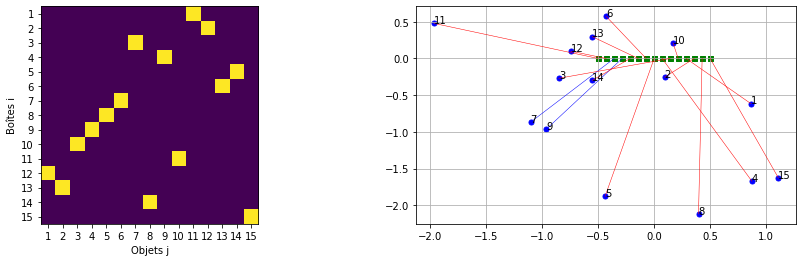

In [5]:
# Contrainte q5
u = np.zeros(N); u[6] = 1
v = np.zeros(N); v[8] = 1
a = np.zeros((N,N))
a[np.triu_indices(4,1)]=-1
a[np.triu_indices(4,2)]=0
constraintq5 = np.kron(np.eye(N),u)+np.kron(a,v)+np.kron(a.T,v)
resq5 = np.zeros((N,1))

# Résolution problème via cvxpy
x = cp.Variable((N*N,1), boolean=True)
prob = cp.Problem(cp.Minimize(sum(distance.T@x)), [Aeq@x == beq, 
                                                   constraintq3@x == resq3, 
                                                   constraintq4@x <= resq4, 
                                                   constraintq5@x == resq5])
fvalq5 = prob.solve()
print("La valeur de la fonction objective est :", round(fvalq5,5))

# On affiche xmat par soucis de clarté
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
plt.subplot(1, 2, 1)
xmat = x.value.reshape((N,N))
plt.xlabel("Objets j")
plt.ylabel("Boîtes i")
centers = [1,N,N,1]
dx, = np.diff(centers[:2])/(xmat.shape[1]-1)
dy, = -np.diff(centers[2:])/(xmat.shape[0]-1)
extent = [centers[0]-dx/2, centers[1]+dx/2, centers[2]+dy/2, centers[3]-dy/2]
plt.imshow(xmat, extent=extent)
plt.xticks(np.arange(centers[0], centers[1]+dx, dx))
plt.yticks(np.arange(centers[3], centers[2]+dy, dy))

# On affiche le plan (x,y)
plt.subplot(1, 2, 2)
plt.scatter(C[:, 0], C[:, 1], s=25, marker="s", color="green")
plt.scatter(O[:, 0], O[:, 1], s=25, marker="o", color="blue")
plt.grid()
for i, val in enumerate(O):
    plt.annotate(i+1, (val[0], val[1]))

for i in range(0, xmat.shape[0]):
    for j in range(0, xmat.shape[1]):
        if xmat[i][j] == 1:
            if j == 6 or j == 8:
                plt.plot([O[j, 0], C[i, 0]], [O[j, 1], C[i, 1]], linewidth=0.5, color="blue")
            else:    
                plt.plot([O[j, 0], C[i, 0]], [O[j, 1], C[i, 1]], linewidth=0.5, color="red")

Nous avons donc $f_{opt} = 15,92$ suite à la contrainte $\forall i, x_{i,9} = \sum_{k=-1,k>0}^{1,k<N}x_{i+k,7}$.


### Question 6)

Pour répondre quant à l'unicité de la solution, nous allons ajouter la contrainte suivante : $x_{opposé}^{T} * x \geq 1$, avec $x_{i,j}^{opposé} = 1$ si $x_{i,j} = 0$, $x_{i,j}^{opposé} = 0$ si $x_{i,j} = 1$.  
L'idée est relancer l’algorithme en rajoutant la contrainte que la solution $x$ doit être différente de la solution trouvée lors de la question précédente.

La valeur de la fonction objective avec une solution forcément différente est : 15.92039
Nous pouvons numériquement vérifier que la différence des deux fonctions objectives q5 et q6 est nulle : fvalq5 - fvalq6 =  0.0


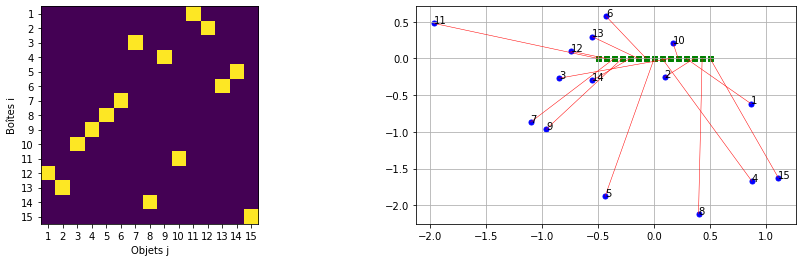

In [15]:
# Vecteur x trouvé à la question 5
lastsolution = x.value
x_oppose = np.where(lastsolution==0,1,0)

# Résolution problème via cvxpy
x = cp.Variable((N*N,1), boolean=True)
prob = cp.Problem(cp.Minimize(sum(distance.T@x)), [Aeq@x == beq, 
                                                   constraintq3@x == resq3, 
                                                   constraintq4@x <= resq4,
                                                   constraintq5@x == resq5,
                                                   x_oppose.T@x >= 1])
fvalq6 = prob.solve()
print("La valeur de la fonction objective avec une solution forcément différente est :", round(fvalq6,5))
print("Nous pouvons numériquement vérifier que la différence des deux fonctions objectives q5 et q6 est nulle : fvalq5 - fvalq6 = ",fvalq5-fvalq6)

# On affiche xmat par soucis de clarté
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
plt.subplot(1, 2, 1)
xmat = x.value.reshape((N,N))
plt.xlabel("Objets j")
plt.ylabel("Boîtes i")
centers = [1,N,N,1]
dx, = np.diff(centers[:2])/(xmat.shape[1]-1)
dy, = -np.diff(centers[2:])/(xmat.shape[0]-1)
extent = [centers[0]-dx/2, centers[1]+dx/2, centers[2]+dy/2, centers[3]-dy/2]
plt.imshow(xmat, extent=extent)
plt.xticks(np.arange(centers[0], centers[1]+dx, dx))
plt.yticks(np.arange(centers[3], centers[2]+dy, dy))

# On affiche le plan (x,y)
plt.subplot(1, 2, 2)
plt.scatter(C[:, 0], C[:, 1], s=25, marker="s", color="green")
plt.scatter(O[:, 0], O[:, 1], s=25, marker="o", color="blue")
plt.grid()
for i, val in enumerate(O):
    plt.annotate(i+1, (val[0], val[1]))

for i in range(0, xmat.shape[0]):
    for j in range(0, xmat.shape[1]):
        if xmat[i][j] == 1:
                plt.plot([O[j, 0], C[i, 0]], [O[j, 1], C[i, 1]], linewidth=0.5, color="red")

On voit donc que **la solution n'est pas unique**. En effet, les objets $13$ et $14$ sont disposés symétriquement par rapport à l'axe de $x$ (aux boîtes), cela signifie donc que le rangement de l'une dans une boîte est équivalent au rangement de l'autre dans la même boîte. 

<p id="2.2" style="text-align:center">
    <B><font size="+1">2.2 Communication entre espions</font></B>
</p>

### Question 1)

Pour résoudre cet exercice, nous allons utiliser la méthode de l'arbre recouvrant de poids minimum (ARM). Afin de minimiser la probabilité d'interception, nous allons passer par le complémentaire $\mathbb{P}(non\,interception) = 1 - \mathbb{P}(interception)$. Cela nous permetttra d'avoir des événements indépendants. Or, il est important de noter que l'ARM est fonctionnel pour la somme des arrêtes, nous allons donc passer au $log$ afin de pouvoir effecuer notre ARM. De plus, la fonction *log* étant négative entre 0 et 1, nous allons utiliser l'opposé afin d'être sur que notre algorithme minimisera la somme des aretes. Nous pourrons ensuite retrouver notre probabilité d'interception en passant à l'exponentielle, puis au complémentaire. De telle sorte à avoir : 

$$\mathbb{P}(interception) = 1 - \mathbb{P}(non\,interception) = 1 - e^{min_{i,j} -log(\prod_{i,j}(1-p_{ij}))} = 1 - e^{min_{i,j} \sum_{i,j}-log((1-p_{ij})))}$$

Pour résoudre ce problème, nous allons premièrement utiliser et comparer 2 algorithmes différents : l'algorithme de  Kruskal $(O(n^{2}))$ et l'algorithme de Prim$(O(n^{2}))$, que nous allons coder "à la main". Nous utiliserons ensuite la librairie **networkx**, comportant déjà ces algorithmes (et aussi celui de Boruvka) en fin d'exercice, afin de vérifier nos résultats.

La librairie **igraph** nous permettra d'afficher notre ARM pour les deux algorithmes codés, on peut noter que **igraph** dispose aussi des algorithmes de Kruskal, Prim et Boruvka, nous allons tout de même utiliser **networkx** afin de présenter deux librairies équivalentes permettant de manipuler les graphes en Python.

Nous avons donc notre représentation du graphe $G = (S,E)$ ($S = 15$ sommets et $E = 45$ arrêtes), non orienté. De plus, on peut vérifier qu'il existe une arrête pour chaque paire de sommets donc notre graphe est connexe.

Notre but est donc de trouver le chemin recouvrant (arbre), dont la somme des poids des arêtes est minimal.

Voici le bloc permettant de loader les données : 

In [1]:
import numpy as np
import time
from igraph import *

Pij = np.loadtxt("Données_pour_le_TP/ProbaInterception.txt")
S = Pij.shape[0]
Pij = np.nan_to_num(Pij, nan=0) # NaN -> 0 pour le tri des aretes
Pij_comp = 1-Pij # On passe au complémentaire afin d'avoir les pij de non interceptions -> on peut faire le produit
Pij_comp = -np.log(Pij_comp) # On passe au log afin d'avoir la somme (et on prend l'opposé pour que l'arbre soit minimal)

### Question 2)
### Algorithme de Kruskal 

Voici les étapes de l'algorithme de Kruskal : 
- trier les arrêtes dans l'ordre croissant
- se doter de la capacité de stocker les aretes qui seront selectionnées dans l'arbre (stocker les ensembles $S$)
- pour chaque arête $(a,b)$, si $S(a) \ne S(b)$, alors on stocke l'union $(a,b)$, et on selectionne l'arete correspondante. L'arête sera donc ignorée si et seulement si ses deux sommets correspondants sont dans le même ensemble, c'est-à-dire si un cycle est créé.
- on arrête lorsque le nombre d'aretes sélectionnées est égal à $S - 1$.

Notre algorithme s'est exécuté en 0.000808s.
La probabilité totale que le message     soit intercepté est de : 0.5809.
Voici la liste de communicaiton directe entre agents :  [(2, 4), (6, 14), (11, 14), (1, 12), (6, 15), (5, 10), (3, 14), (5, 13), (4, 8), (4, 9), (3, 7), (1, 6), (9, 11), (3, 5)]
Ainsi que l'ARM (Kruskal) représenté :



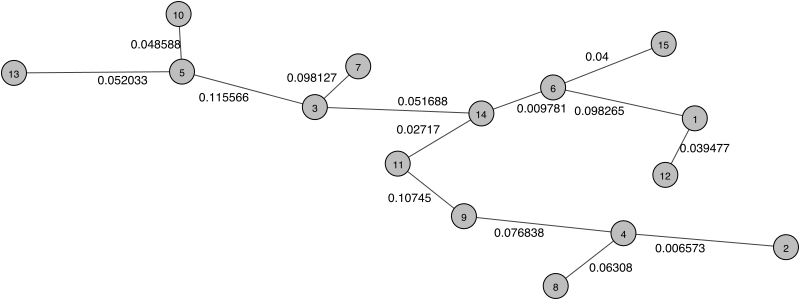

In [2]:
# On classe les aretes par ordre croissant
aretes = sorted([i for n in np.triu(Pij_comp) for i in n if i != 0])
# En y référencant les agents correspondants en clé (les sommets de chaque arete) - Les clés sont des tuples
dicoAretes = dict()
for arete in aretes:
    dicoAretes[(int(np.where(np.triu(Pij_comp) == arete)[0]) + 1, int(np.where(np.triu(Pij_comp) == arete)[1]) + 1)] = arete

# Initialisation de l'ensemble des poids/arrêtes de l'ARM
MST = dict()

# Initialisation de la liste dynamique des ensembles
ensembles = list()

start = time.time()
# Coeur de l'algorithme de Kruskal
for agents, e in dicoAretes.items():
    firstArete = agents[0]
    secondArete = agents[1]
    # On cherche l'index de la premiere arrete dans la liste dynamique
    indexFirstArete = [ensembles.index(ens) for ens in ensembles if firstArete in ens] 
    indexSecondArete = [ensembles.index(ens) for ens in ensembles if secondArete in ens]
    if (len(indexFirstArete) == 0) and (len(indexSecondArete) == 0):
        MST[agents] = e
        ensembles.append([firstArete, secondArete])

    elif len(indexFirstArete) == 1 and len(indexSecondArete) == 0:
        MST[agents] = e
        ensembles[indexFirstArete[0]].append(secondArete)

    elif len(indexFirstArete) == 0 and len(indexSecondArete) == 1:
        MST[agents] = e
        ensembles[indexSecondArete[0]].append(firstArete)

    # On ajoute l'arête seulement si aucun cycle n'est créé
    elif len(indexFirstArete) == 1 and len(indexSecondArete) == 1:
        if indexFirstArete == indexSecondArete:
            continue
        else:
            MST[agents] = e
            for arete in ensembles[indexSecondArete[0]]:
                # On met à jour la liste d'ensemble
                ensembles[indexFirstArete[0]].append(arete)
            ensembles.remove(ensembles[indexSecondArete[0]]) 

    if len(MST) == S - 1: # Le nb d'aretes de l'ARM est égal au nb de sommets - 1
        break
end = time.time()

pathARM_Kr = list(MST.keys())
weightsARM_Kr = list(MST.values())
weights_Pij = [Pij]

print("Notre algorithme s'est exécuté en {}s.\nLa probabilité totale que le message \
    soit intercepté est de : {}.".format(round(end-start,6), round(1 - np.exp(-sum(weightsARM_Kr)),4)))
print("Voici la liste de communicaiton directe entre agents : ", pathARM_Kr)

# -------------- On affiche le graphe ----------------------------------
print("Ainsi que l'ARM (Kruskal) représenté :\n")
g = Graph(n=15, directed=False)
for i in range(len(g.vs)):
    g.vs[i]["id"]= i
    g.vs[i]["label"]= str(i+1)
g.add_edges([(i-1,j-1) for (i,j) in pathARM_Kr])
g.es['weight'] = [1 - np.exp(-weight) for weight in weightsARM_Kr]
g.es['label'] = [round(1 - np.exp(-weight),6) for weight in weightsARM_Kr]
visual_style = {}
#out_name = "graph.png"
visual_style["bbox"] = (800,300)
visual_style["margin"] = 14
visual_style["vertex_color"] = 'grey'
visual_style["vertex_size"] = 25
visual_style["vertex_label_size"] = 10
visual_style["edge_curved"] = False
my_layout = g.layout_lgl()
visual_style["layout"] = my_layout
plot(g, **visual_style)

### Algorithme de Prim 

Voici les étapes de l'algorithme de Prim : 
- Partir d'un sommet quelconque,
- faire une coupe selon les arrêtes du/des sommet(s) selectionné(s), choisir l'arête de poids minimal, puis en stocker le nouveau sommet incident,
- on arrête lorsque le nombre de sommets selectionnés est égal au nombre de sommets total.

Notre algorithme s'est exécuté en 0.000682s.
La probabilité totale que       le message soit intercepté est de 0.5809.
Voici la liste de communicaiton directe entre agents :  [(1, 12), (1, 6), (6, 14), (11, 14), (6, 15), (3, 14), (3, 7), (9, 11), (4, 9), (2, 4), (4, 8), (3, 5), (5, 10), (5, 13)]
Voici l'ARM (Prim) représenté :



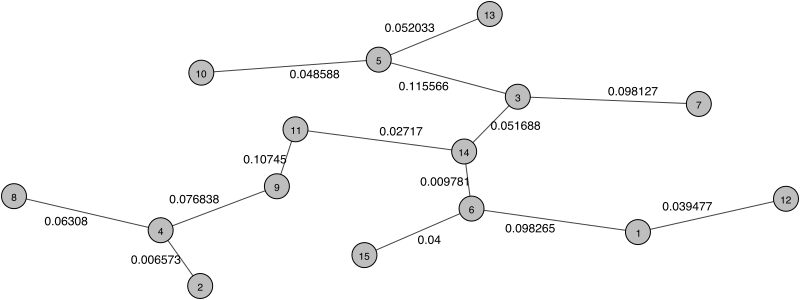

In [3]:
# On répertorie les arêtes
aretes = [i for n in np.triu(Pij_comp) for i in n if i != 0]
# En y référencant les agents correspondants en clé (les sommets de chaque arete) - Les clés sont des tuples
dicoAretes = dict()
for arete in aretes:
    dicoAretes[(int(np.where(np.triu(Pij_comp) == arete)[0]) + 1, 
                int(np.where(np.triu(Pij_comp) == arete)[1]) + 1)] = arete

# Initialisation de l'ensemble des poids/arrêtes de l'ARM
MST = dict()

# Initialisation de la liste dynamique des ensembles
arbre = list()
arbre.append(list(dicoAretes.keys())[0][0])

start = time.time()
# Coeur de l'algorithme de Prim
while len(arbre) < S:
    dictemp = {key: value for key, value in dicoAretes.items() 
               if (key[0] in arbre and key[1] not in arbre) or (key[1] in arbre and key[0] not in arbre)}
    MST.update({key: value for key, value in dictemp.items() if value == min(dictemp.values())})
    del dicoAretes[list(MST.keys())[-1]]
    if list(MST.keys())[-1][1] in arbre:
        arbre.append(list(MST.keys())[-1][0])
    else:
        arbre.append(list(MST.keys())[-1][1])

    if len(arbre) == S:  # Le nb de sommets sélectionnés est égal au nb de sommets
        break
end = time.time()

pathARM_Prim = list(MST.keys())
weightsARM_Prim = list(MST.values())

print("Notre algorithme s'est exécuté en {}s.\nLa probabilité totale que \
      le message soit intercepté est de {}.".format(round(end-start,6), 
                                                    round(1 - np.exp(-sum(weightsARM_Prim)),4)))
print("Voici la liste de communicaiton directe entre agents : ", pathARM_Prim)

# -------------- On affiche le graphe ----------------------------------
print("Voici l'ARM (Prim) représenté :\n")
g2 = Graph(n=15, directed=False)
for i in range(len(g.vs)):
    g2.vs[i]["id"]= i
    g2.vs[i]["label"]= str(i+1)
g2.add_edges([(i-1,j-1) for (i,j) in pathARM_Prim])
g2.es['weight'] = [1 - np.exp(-weight) for weight in weightsARM_Prim]
g2.es['label'] = [round(1 - np.exp(-weight),6) for weight in weightsARM_Prim]
visual_style = {}
#out_name = "graph.png"
visual_style["bbox"] = (800,300)
visual_style["margin"] = 14
visual_style["vertex_color"] = 'grey'
visual_style["vertex_size"] = 25
visual_style["vertex_label_size"] = 10
visual_style["edge_curved"] = False
my_layout = g2.layout_lgl()
visual_style["layout"] = my_layout
plot(g2, **visual_style)

Comme nous pouvons le voir, on trouve la même probabilité totale d'interception avec les deux algotithmes de Kruskal et Prim, soit
  
$\mathbb{P}^{Kruskal}(interception) = \mathbb{P}^{Prim}(interception) = 0,5809$.  

D'un point de vue temps d'exécution, l'algorithme de Kruskal est tout de même plus rapide, cela vient très probablement de la façon dont nous avons codé.

Passons désormais à la librairie **networkx**.

### Librairie networkx

Voici le graphe initial correspondant à notre problème : 


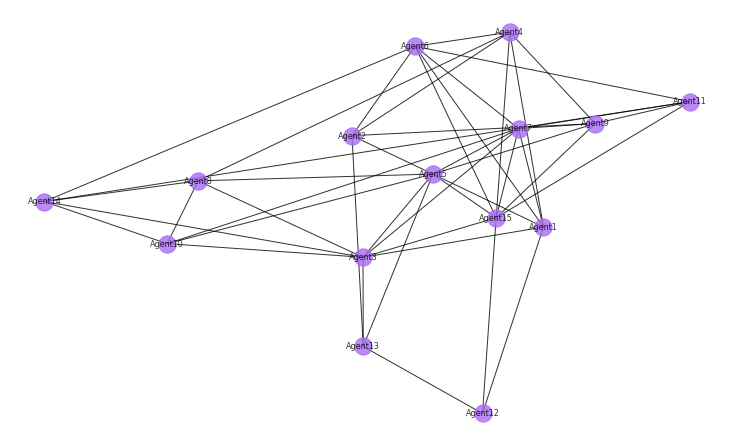

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import time

Pij = np.loadtxt("Données_pour_le_TP/ProbaInterception.txt")
Pij_comp = 1-Pij # On passe au complémentaire afin d'avoir les pij de non interceptions -> on peut faire le produit
Pij_comp = -np.log(Pij_comp) # On passe au log afin d'avoir la somme et on prend l'opposé pour que l'arbre soit minimal)

def InterceptProba(T): 
    """ Retrouver la probabilité totale avec l'ARM """
    prob = []
    iterable_edges = list(T.edges)
    for i in iterable_edges:
       prob.append(T.edges[i]["weight"])
    return 1-np.exp(-sum(prob))

def initialize_grph(Pij):
    """ Initialisation et affichage du graphe """
    G = nx.Graph()
    for i in range(0,len(Pij)):
       pos_nan = list(itertools.chain(*list(map(list, np.where(np.isnan(Pij[i]))))))
       if(len(pos_nan)) != len(Pij_comp[i]):
           G.add_node(i)
    list(G.nodes)
    for i in range(0,len(Pij_comp)):
        for j in range(0,len(Pij_comp)):
            if math.isnan(Pij_comp[i][j])==False:
                e = (i,j)
                G.add_edges_from([e], weight = float(Pij_comp[i][j]))
    list(G.edges)
    dic = {}
    for i in range(0,len(list(G.nodes))):
        dic[i] = "Agent" + str(i+1)
    G = nx.relabel_nodes(G,dic) # Nommer les labels
    plt.figure(figsize=(10,6))
    nx.draw(G,with_labels=True,font_size=8,
          alpha=0.8,node_color="#A86CF3")
    plt.show()
    return G

# Construction du graphe et affichage
print("Voici le graphe initial correspondant à notre problème : ")
G = initialize_grph(Pij)

Voici l'ARM donné par l'algorithme Kruskal de la librairie networkx : 


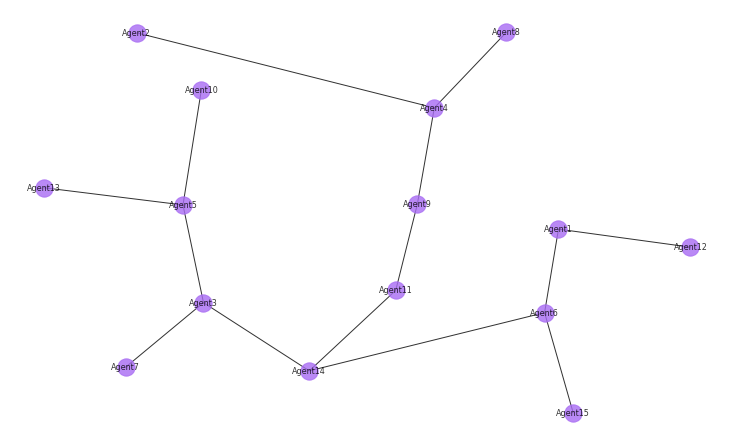

Avec une probabilité d'interception totale de : 0.5809187658378592.
Avec un temps d'execution de : 0.0005s.

Voici l'ARM donné par l'algorithme Prim de la librairie networkx : 


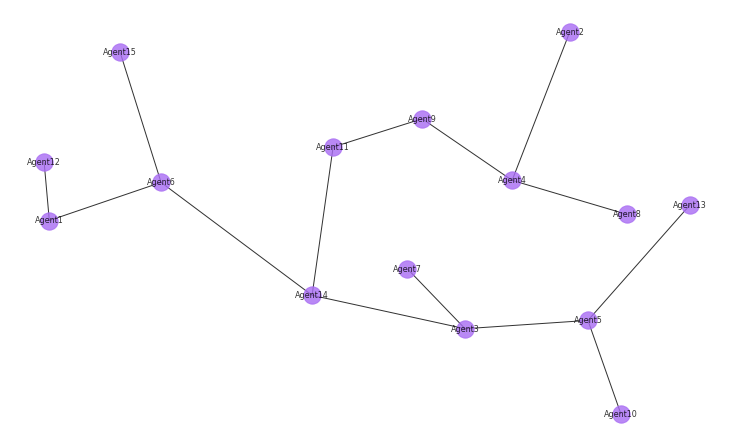

Avec une probabilité d'interception totale de : 0.5809187658378593.
Avec un temps d'execution de : 0.0003s.

Voici l'ARM donné par l'algorithme Boruvka de la librairie networkx : 


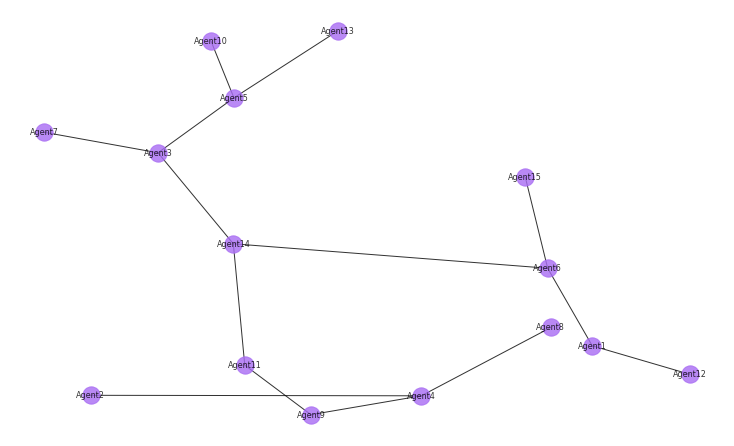

Avec une probabilité d'interception totale de : 0.5809187658378592.
Avec un temps d'execution de : 0.0008s.


In [21]:
# ARM Kruskal
print("Voici l'ARM donné par l'algorithme Kruskal de la librairie networkx : ")
start = time.time()
lib_Kruskal = nx.minimum_spanning_tree(G, weight='weight', algorithm='kruskal', ignore_nan=False)
end = time.time()
plt.figure(figsize=(10,6))
nx.draw(lib_Kruskal,with_labels=True,font_size=8,
alpha=0.8,node_color="#A86CF3")
plt.show()
print("Avec une probabilité d'interception totale de : {}.\nAvec un temps d'execution de : {}s.\n".format(InterceptProba(lib_Kruskal), round(end-start,4)))

# ARM Prim
print("Voici l'ARM donné par l'algorithme Prim de la librairie networkx : ")
start = time.time()
lib_Prim = nx.minimum_spanning_tree(G, weight='weight', algorithm='prim', ignore_nan=False)
end = time.time()
plt.figure(figsize=(10,6))
nx.draw(lib_Prim,with_labels=True,font_size=8,
alpha=0.8,node_color="#A86CF3")
plt.show()
print("Avec une probabilité d'interception totale de : {}.\nAvec un temps d'execution de : {}s.\n".format(InterceptProba(lib_Prim), round(end-start,4)))

# ARM Boruvka
print("Voici l'ARM donné par l'algorithme Boruvka de la librairie networkx : ")
start = time.time()
lib_Boruvka = nx.minimum_spanning_tree(G, weight='weight', algorithm='boruvka', ignore_nan=False)
end = time.time()
plt.figure(figsize=(10,6))
nx.draw(lib_Boruvka,with_labels=True,font_size=8,
alpha=0.8,node_color="#A86CF3")
plt.show()
print("Avec une probabilité d'interception totale de : {}.\nAvec un temps d'execution de : {}s.".format(InterceptProba(lib_Boruvka), round(end-start,4)))

Nous trouvons donc la même probabilité totale d'interception avec les trois algotithmes de Kruskal, Prim et Boruvka, soit  

$$\mathbb{P}_{networkx}^{Kruskal}(interception) = \mathbb{P}_{networkx}^{Prim}(interception) = \mathbb{P}_{networkx}^{Boruvka}(interception) = 0,5809$$.

D'un point de vue temps d'exécution, on peut voir en rejouant le bloc précédent qu'on a $t_{Prim} < t_{Kruskal} < t_{Boruvka}$ en moyenne.
Pour nos algorithmes codés, à la main, on voit que les temps d'exécution sont très similaires.

Cela nous conforte dans nos résultats précédents, nous pouvons donc affirmer que $\mathbb{P}(interception) = 0,5809$.

<p><br></p>
<p id="2.3" style="text-align:center">
    <B><font size="+1">2.3 Approvisionnement d'un chantier</font></B>
</p>
<p><br></p>

### <center>Méthode PNE</center>

Tout d'abord, ce problème peut être modélisé de manière non linéaire, en effet, si pour un $x > 0$ on a une "entrée" de tractopelles et une "sortie" pour $x < 0$, on voit que le coût d'entrée et de sortie dépend du signe de $x$. Nous pouvons donc en premier lieu résoudre ce problème en nombre entiers (PNE) avec le package **cvxpy**.

La formulation mathématique étant : 
$$min_{x}\, (B*\mathbb{1}_{x>0} + L*x + R*\mathbb{1}_{x<0}),$$ 

avec $B = 800*(1,...,1)_{N}$, $L = 200*\mathbb{I}_{N}^{trisup}$, $R = 1200 * (1,...,1)_{N}$, sous les contraintes $\mathbb{I}_{N}^{trisup} * x \geq d$ et $(1,...,1)_{N}^{T}*x = 0$.  
$d$ est le vecteur représentant les besoins en engins sur le chantier, avec un $0$ ajouté en dernier élément afin de satisfaire le fait que la société de location doit récupérer tous les engins à la fin des travaux.

In [30]:
import numpy as np
import cvxpy as cp

d = np.loadtxt("Données_pour_le_TP/DonneesEnginsChantier.txt")
d = np.append(d,0)
N = d.shape[0]

# On initialise nos vecteurs couts
buy = 800 * np.ones((1,N))
loc = 200 * np.ones((1,N))
remove = 1200 * np.ones((1,N))

# On résout notre problème avec la contrainte de besoin d'engins
x = cp.Variable(N, integer=True)
prob = cp.Problem(cp.Minimize(buy@cp.pos(x) + np.tril(np.ones(N))@x@loc.T + remove@cp.neg(x)), constraints=[np.tril(np.ones(N))@x >= d, np.ones(N)@x == d[-1]])
fobj = prob.solve()
print("Voici le x (entreé/sortie d'engins) pour chaque semaine :\n", x.value, "\n")
print("Voici le nombre d'engins sur le chantier chaque semaine :\n", np.tril(np.ones(N))@x.value,"\n")
print("Nous trouvons une fonction objective minimisée de {}.\n".format(int(fobj)))

Voici le x (entreé/sortie d'engins) pour chaque semaine :
 [  36.   25.   23.    3.   34.    0.    0.    0.    0.    0.    0.   28.
    0.    9.    0.    0.    0.   22.  -10.   -5.   -7.  -27.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.   -5.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   19.    0.    5.    0.
    0.    0.    0.    0.   16.    0.    1.   -3.    0.    0.    0.  -27.
   -3.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    7.   14.   -4.  -26.    0.  -13.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.   37.   22.    0.    2.    0.    0.    0.    0.
    0.    0.  -44. -129.] 

Voici le nombre d'engins sur le chantier chaque semaine :
 [ 36.  61.  84.  87. 121. 121. 121. 121. 121. 121. 121. 149. 149. 158.
 158. 158. 158. 180. 170. 165. 158. 131. 131. 131. 131. 131. 131. 131.
 131. 131. 131. 131. 131. 126. 126. 126. 126. 126. 126. 126. 126. 126.
 126. 126. 145. 145. 150. 150. 150. 150. 150. 150. 166. 1

Avec la méthode du PNE, nous trouvons donc une fonction objective $f_{obj} = 3 \, 311 \, 200$.

### <center>Méthode PLNE</center>

Le problème initial étant non linéaire , nous ne pouvons pas le résoudre à l'aide de méthodes du type PNLE. Pour résoudre ce problème, nous allons chercher à nous ramener à une formulation linéaire en augmentant la taille du problème. En effet, nous determinons un nouveau vecteur :  

\begin{aligned} \omega = (x,y,z)   \qquad   \end{aligned}

 - $x_{i}$ correspondant au nombre d'engins sur le chantier à l'instant i
 - $y_{i}$ correspondant au nombre d'engins supplémentaire à acheminer entre i et i-1.
 - $z_{i}$ correspondant au nombre d'engins en excés à restituer entre i et i-1.

L'intérêt de cette nouvelle formule est de considérer ces quantitées séparement et d'imposer des contraintes précises sur ces quantités.

On fixe pour les semaines $0$ et $N+1$ les conditions : $x_{0} = 0$ ; $x_{N+1} = 0$

Formulation de la fonction objective:
                        
\begin{aligned} f(\omega) =  c*\omega \end{aligned}



avec:
-  $\omega$ un vecteur colonne de taille $3(N+1)$
-  $c$ = ($p_{loc}$,...,$p_{loc}$,$p_{init}$,...,$p_{init}$,$p_{fin}$,...,$p_{fin}$) de taille $3(N+1)$ composé de $N+1$ elements  $p_{loc}$, $p_{init}$ et $p_{fin}$.


Formulation des contraintes:


 - On cherche à modeliser les contraintes tel que le nombre d'engins minimum requis à chaque instant et le respect des relations suivantes : 
 \begin{aligned} y_{i} =(x_{i} - x_{i-1})*\mathbb{1}_{(x_{i} - x_{i-1})>0}\quad z_{i} =(x_{i-1} - x_{i})*\mathbb{1}_{(x_{i-1} - x_{i})>0} \end{aligned}


Dans un premier temps, on modélise la contrainte sur le nombre d'engins minimum a chaque étape $i$ :


\begin{aligned} ( I_{N+1} \quad 0_{N+1} \quad 0_{N+1})*\omega \ge d  \end{aligned} 

avec d le vecteur du minimum d'engins nécessaires. 

Ensuite on formule les contraintes pour faire respecter les relations existantes entre les 
variables $y$ et $x$, puis $z$ et $x$ .


En effet: 
 - Dans le cas ou  $x_{i}$ > $x_{i-1}$ ,on doit verifier $x_{i}$ - $x_{i-1}$ = $y_{i}$ et 
   $z_{i}$ = 0. 
   On pose les conditions suivantes: $y_{i}$ > $x_{i}$ - $x_{i-1}$ , $y_{i}$ >= 0 et $z_{i}$ > $x_{i-1}$ - $x_{i}$ , $z_{i}$ >= 0.
   Dans ce cas l'algorithme cherche à minimiser les coûts donc va chercher à reduire au maximum la valeur de y et va saturer la contrainte d'inegalité pour y, tandis que pour z, si on ne le borne pas, la quantité peut prendre une valeur negative et donc il va avoir tendance a donner des valeurs negative a z pour contre balancer le coût induit par y.
   
 - Dans le cas ou  $x_{i}$ < $x_{i-1}$ ,on doit verifier $x_{i-1}$ - $x_{i}$ = $z_{i}$ et 
   $y_{i}$ = 0. 
   On pose les conditions suivantes: $y_{i}$ > $x_{i}$ - $x_{i-1}$ , $y_{i}$ >= 0 et $z_{i}$ > $x_{i-1}$ - $x_{i}$ , $z_{i}$ >= 0.
   Dans ce cas l'algorithme cherche à minimiser les coûts donc il va chercher à reduire au maximum la valeurs de z et va saturer la contrainte d'inegalité pour z, tandis que pour y, si on ne le borne pas, la quantité peut prendre une valeur negative et donc il va avoir tendance a donner des valeurs negative a y pour contre balancer le coût induit par z.
   
Ces contraintes se formulent donc sous forme matricelle D*$\omega$ > B et à l'aide de bornes.

Avec B une vecteur colonne nul de taille $2(N+1)$ et la matrice D de dimension $2(N+1)$  X
$3(N+1)$ :

\begin{pmatrix}
A & I_{N+1} & 0_{N+1}\\
-A & 0_{N+1} & -I_{N+1}\\
\end{pmatrix}

avec A de la forme : 

\begin{pmatrix}
1 & -1 & 0 & \dots & 0 & 0 & 0 \\
0 & 1 & -1 &\ddots &  &  & 0  \\
0 & 0 & 1  & \ddots & 0 &  &0\\
\vdots & & 0 & \ddots & \ddots & 0 & 0 \\
0 &  &  & \ddots & \ddots & \ddots & 0 \\
0 & \dots & \dots & \dots & 0 & 1 & -1 \\
\end{pmatrix}

En concatenant les deux contraintes d'inegalités et en imposant les bornes suivantes pour y et z:
 - \begin{aligned}  y \ge  0  \quad et \quad  z \ge  0     \end{aligned}
 
On obtient alors la solution implementée ci dessous:

In [26]:
import numpy as np
import cvxpy as cp

d = list()
d = np.append(d,0)
d = np.append(d,np.loadtxt("Données_pour_le_TP/DonneesEnginsChantier.txt"))
d = np.append(d,0)
d = np.array((d))
N = d.shape[0]

buy = list(800 * np.ones((1,N)))
loc =list( 200 * np.ones((1,N)))
remove = list(1200 * np.ones((1,N)))

'''Objective function'''
c = np.reshape(np.array(loc + buy + remove),3*(N))

# Boundaries
lowerb = np.zeros(3*N)
for i in range(0,N): 
    lowerb[i] = d[i]

# Equality constraints
Aeq = np.zeros((2,3*N));Aeq[0,N-1] = 1;Aeq[1,0] = 1
beq = np.zeros(2)

# Inequality constraints  
Aineq1 = np.concatenate((np.array((np.eye(N,N))),np.array((np.zeros((N,N)))),np.array((np.zeros((N,N))))),axis=1)
Aineq2 = np.concatenate((np.array((np.diag([-1]*N) + np.diag(1*np.ones(N-1), -1))),np.array((np.eye(N,N))),np.array((np.zeros((N,N))))),axis=1)
Aineq3 = np.concatenate((np.array((np.diag([1]*N) + np.diag(-1*np.ones(N-1), -1))),np.array((np.zeros((N,N)))),np.array((np.eye(N,N)))),axis=1)
Aineq = np.array((np.concatenate(((Aineq1),(Aineq2),(Aineq3)),axis = 0)))
bineq = np.concatenate((np.array((d)),np.array((np.zeros(N))),np.array((np.zeros(N)))),axis= 0)

# On résoud le problème d'optimisation
x = cp.Variable(3*N, integer=True)
objective = cp.Minimize(c @ x)
constraints = [lowerb <= x, Aineq @ x >= bineq, Aeq @ x == beq]
prob = cp.Problem(objective, constraints)
result = prob.solve()
x.value[0:N]
print("Voici le x (entreé/sortie d'engins) pour chaque semaine :\n", x.value[1:N] - x.value[0:N-1],"\n")
print("Voici le nombre d'engins sur le chantier chaque semaine :\n", x.value[0:N],"\n")
print("Nous trouvons une fonction objective minimisée de {}.\n".format(int(result)))

Voici le x (entreé/sortie d'engins) pour chaque semaine :
 [  36.   25.   23.    3.   34.    0.    0.    0.    0.    0.    0.   28.
    0.    9.    0.    0.    0.   22.  -10.   -5.   -7.  -27.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.   -5.   -5.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   24.    0.    5.    0.
    0.    0.    0.    0.   16.    0.    1.   -3.    0.    0.    0.  -27.
   -3.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    7.   14.   -4.  -26.    0.  -19.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    6.   37.   22.    0.    2.    0.    0.    0.    0.
    0.    0.  -44. -129.] 

Voici le nombre d'engins sur le chantier chaque semaine :
 [  0.  36.  61.  84.  87. 121. 121. 121. 121. 121. 121. 121. 149. 149.
 158. 158. 158. 158. 180. 170. 165. 158. 131. 131. 131. 131. 131. 131.
 131. 131. 131. 131. 131. 131. 126. 121. 121. 121. 121. 121. 121. 121.
 121. 121. 121. 145. 145. 150. 150. 150. 150. 150. 150. 1

Nous pouvons voir qu'avec le PLNE, nous retrouvons la même fonction objective, $f_{obj} = 3 \, 311 \, 200$. Cela nous conforte donc dans nos résultats. 

### <center>Méthode PCC</center>

Une autre méthode serait de construire un graphe afin d'y appliquer un algorithme de plus court chemin. Nous allons donc tout d'abord construire le graphe correspondant au problème, puis utiliser l'algorithme de Dijkstra (de complexité $O(n^{2})$).
  
Notre graphe sera représenté sur un plan $(x,y)$ avec les semaines sur l'axe des $x$ et les différents noeuds possibles sur l'axe $y$. Afin de respecter les contraintes, les noeuds du graphe seront supérieurs ou égaux au nombre d'engins necessaires, pour chaque $x$. De plus, chaque noeud aura une valeur inférieure ou égale au maximum d'engins nécessaires, soit $180$ (des valeurs supérieures seraient inutiles car de chemin non optimal).

Par soucis de clarté et de temps d'exécution, seulement le graphe avec le plus court chemin sera affiché (pas celui avec toutes les aretes).

Nous trouvons une fonction objective minimisée de 3311200.
Avec un temps d'exécution de 1.39s pour l'algorithme de Dijkstra.

Voici le graphe correspondant au plus court chemin de notre problème : 



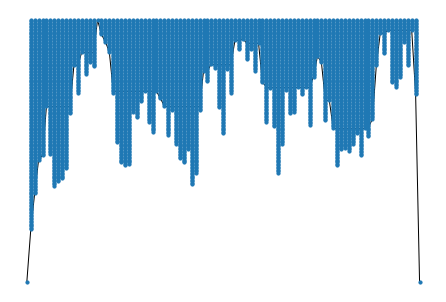

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time

d = np.loadtxt("Données_pour_le_TP/DonneesEnginsChantier.txt")

def machinery_cost(p_init, p_loc, p_fin, node1, node2):
    '''Fonction de cout pour chaque arete'''
    c = p_loc*node2 + p_init*max(node2-node1, 0) + p_fin*max(node1-node2, 0)
    return c

# On construit notre graphe avec toutes les aretes
g = nx.Graph()
g.add_node((0, 0), posxy=(0, 0))
for i, val in enumerate(d):
    previousnodes = [(m, n) for (m, n) in list(
        nx.get_node_attributes(g, "posxy").keys()) if m == i]
    seq = [k for k in range(int(val), int(max(d)+1))]
    for k in seq:
        g.add_node((i+1, k), posxy=(i+1, k))
        for prevnode in previousnodes:
            g.add_edges_from(
                [(prevnode, (i+1, k))], weight=machinery_cost(800, 200, 1200, prevnode[1], k))

g.add_node((len(d)+1, 0), posxy=(len(d)+1, 0))
previousnodes = [(m, n) for (m, n) in list(
    nx.get_node_attributes(g, "posxy").keys()) if m == len(d)]
for prevnode in previousnodes:
    g.add_edges_from([(prevnode, (len(d)+1, 0))], weight=machinery_cost(800, 200, 1200, prevnode[1], 0))

# On utilise l'algorithme de dijkstra sur notre graphe 
start = time.time()
nodes_dijkstra = nx.dijkstra_path(g, (0, 0), (len(d)+1, 0))
end = time.time()

# On affiche le résultat de la fonction objective ainsi que le graphe comportant le PCC
weight = list()
gplot = nx.create_empty_copy(g)
for i in range(0, len(nodes_dijkstra)-1):
    weight.append(g.get_edge_data(
        nodes_dijkstra[i], nodes_dijkstra[i+1])["weight"])
    gplot.add_edges_from(
        [(nodes_dijkstra[i], nodes_dijkstra[i+1])], weight=weight[i])
print("Nous trouvons une fonction objective minimisée de {}.\nAvec un temps d'exécution de {}s pour l'algorithme de Dijkstra.\n".format(sum(weight), round(end-start,2)))

print("Voici le graphe correspondant au plus court chemin de notre problème : \n")
plt.figure()
positions = nx.get_node_attributes(gplot, 'posxy')
nx.draw(gplot, positions, node_size=10)
plt.show()

En conclusion, pour chacune de nos approches, nous trouvons la même fonction objective, ce qui conforte la cohérence de nos résultats. Nous pouvons donc affirmer que $f_{obj} = 3 \, 311 \, 200$.

<p><br></p>
<p id="3" style="text-align:center;color:red">
    <B><font size="+2.5">3 - Optimisation multiobjectif : dimensionnement d'une poutre</font></B>
</p>
<p><br></p>
Lors de résolution de problème multi-critères (multiobjectif), nous sommes souvent confronté à des fonctions contradictoires, c'est à dire que minimiser l'une revient à augmenter l'autre. Notre but est ainsi de minimiser au mieux les deux objectifs conjointement.

Dans cet exercice, nous souhaitons dimensionner une poutre creuse, de section carrée de côté a, de longueur unité et de densité unité, la partie creuse à l’intérieur de la poutre étant également de section carrée, de côté $b < a$. On veut minimiser à la fois son poids et sa déflexion : $p(a,b) = a^2 - b^2$, $d(a,b) = \frac{10^{-4}}{10^{-2} + a^4 - b^4}$.  
Sous les contraintes géométriques : $0.02 \leq a \leq 1$ et $0 \leq b \leq a - 0.01$. On peut donc voir que $b-a \leq -0.01$.

L'objectif est d'obtenir une estimation de la surface de Pareto et d'obtenir les solutions pareto-optimales.
<p><br></p>
<p id="3.1" style="text-align:center">
    <B><font size="+1">Méthode Gloutonne</font></B>
</p>
<p><br></p>
Cette méthode consiste à générer N couples $(a,b)$ réalisables et d’approximer le front de Pareto par la courbe obtenue à partir des solutions de rang 1. Nous allons donc utiliser cette méthode en générant aléatoirement des points, satisfaisants nos contraintes, via la loi uniforme $\mathbb{U}_{[0,1]}$ pour $N=100, 1000, 10000$ et discuter les résultats. 

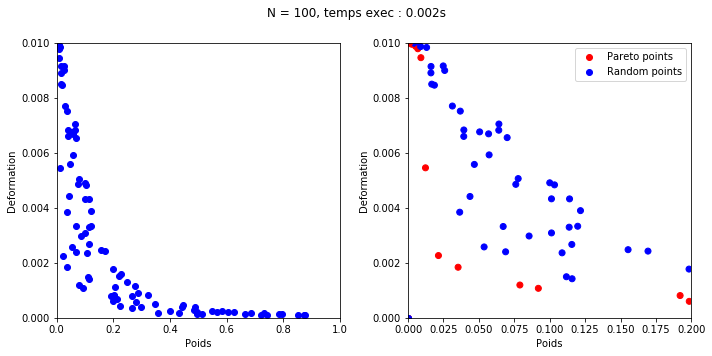

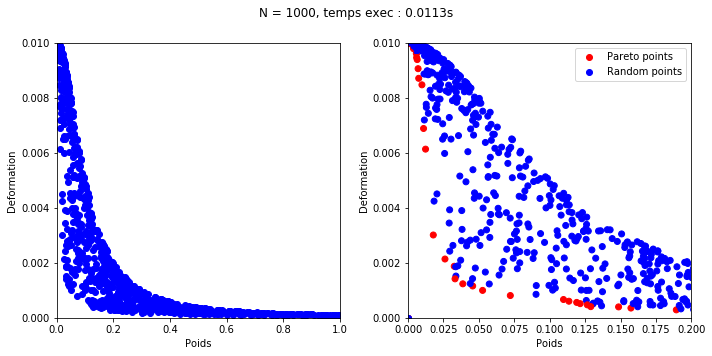

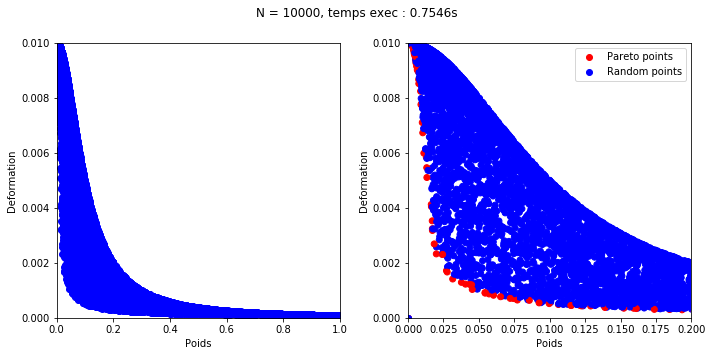

In [21]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from random import *

## Définition de nos fonctions poids et déformation
def p(a_b):
    return a_b[0]**2 - a_b[1]**2
def d(a_b):
    return (1/10**4)/(1/10**2 + a_b[0]**4 - a_b[1]**4)

## Fonction permettant de générer les couples [a,b]
def rand_a_b(N):
    poids = list()
    deform = list()
    for i in range(0, N):
        new_a = lba + (uba-lba)*uniform(0, 1)
        new_b = (new_a-0.01)*uniform(0, 1)
        if new_b < 0:
            new_b = 0
        a_b = [new_a, new_b]
        poids.append(p(a_b))
        deform.append(d(a_b))
    return poids, deform

## Fonction permettant de retourner les points de la surface de pareto
def find_pareto_points(poids, deform):
    x_y = [(poid, defo) for poid, defo in zip(poids, deform)]
    # On supprime les points dominés un par un
    # 3 fois de sorte à être sur qu'on a bien classé tous les points
    for x, y in x_y:
        for u, v in x_y:
            if x < u and y < v:
                x_y.remove((u, v))
    for x, y in x_y:
        for u, v in x_y:
            if x < u and y < v:
                x_y.remove((u, v))
    for x, y in x_y:
        for u, v in x_y:
            if x < u and y < v:
                x_y.remove((u, v))
    return x_y

## Fonction permettant d'afficher les nuages de points
def plot_pareto(poids, deform, x_y, N, t_exec):
    poids2 = list()
    deform2 = list()
    for x, y in x_y:
        poids2.append(x)
        deform2.append(y)
    categories = [0]*N
    for index, poid in enumerate(poids):
        if poid in poids2:
            categories[index] = 1
    colormap = np.array(["b", "r"])
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    plt.setp(ax[0], xlim=(0, 1), ylim=(0, 0.01), xlabel="Poids", ylabel="Deformation")
    plt.setp(ax[1], xlim=(0, 0.2), ylim=(0, 0.01), xlabel="Poids", ylabel="Deformation")
    ax0 = ax[0].scatter(poids, deform, c="b") 
    ax1 = ax[1].scatter(poids, deform, c=colormap[categories]) 
    plt.tight_layout()
    legend1 = plt.scatter([0,0],[0,0], color='r', marker='o')
    legend2 = plt.scatter([0,0],[0,0], color='b', marker='o')
    ax[1].legend([legend1, legend2], ["Pareto points", "Random points"])
    plt.suptitle("N = {}, temps exec : {}s".format(N,str(round(t_exec,4))))
    fig.subplots_adjust(top=0.88)
    plt.show()

lba = 0.02 ; uba = 1
## -------- N = 100 -----------
N = 100
start1 = time.time()
poids, deform = rand_a_b(N)
x_y = find_pareto_points(poids, deform)
end1 = time.time()
plot_pareto(poids, deform, x_y, N, end1-start1)

## -------- N = 1000 -----------
N = 1000
start2 = time.time()
poids, deform = rand_a_b(N)
x_y = find_pareto_points(poids, deform)
end2 = time.time()
plot_pareto(poids, deform, x_y, N, end2-start2)

## -------- N = 10000 -----------
N = 10000
start3 = time.time()
poids, deform = rand_a_b(N)
x_y = find_pareto_points(poids, deform)
end3 = time.time()
plot_pareto(poids, deform, x_y, N, end3-start3)

Nous pouvons voir que le temps d'exécution augmente lorsque $N$ augmente, mais, même pour $N=10000$, celui-ci est relativement faible (voir méthodes suivantes). Nous pouvons également voir que plus $N$ augmente, plus le front de pareto tendra à être convexe. Biensûr, l'augmentation de $N$ fera croître de plus en plus le coût de cette méthode.   

<p><br></p>
<p id="3.2" style="text-align:center">
    <B><font size="+1">Méthode Mono-Objectif - Critère agrégé</font></B>
</p>
<p><br></p>

Dans cette sous-partie, nous utiliserons la fonction *minimize* du package **scipy**, car **cvxpy** ne prend pas en compte la résolution de problèmes d'optimisation non convexe.

Nous allons donc utiliser la méthode de pondération pour recherche de solutions pareto-optimales sur nos fonctions objectives $p(a,b)$ et $d(a,b)$. L'objectif est de minimiser notre critère agrégé : $min_{a,b}P(a,b) = p(a,b) + \alpha * d(a,b)$. En faisant varier $\alpha$ de $0$ à $+\infty$ (on prendra $\alpha_{max} = 10000$), nous aurons donc un problème mono-objectif à résoudre pour chaque $\alpha$, sous les mêmes contraintes. 

Finalement, nous aurons $\alpha$ couples $(a,b)$ optimaux, et pour chacun d'eux, nous allons associer les valeurs poids et déformation, que nous pourrons ensuite tracer afin d'avoir la frontière pareto-optimale.

Voici la frontière de pareto obtenue par méthode de pondération du critère aggrégé : 


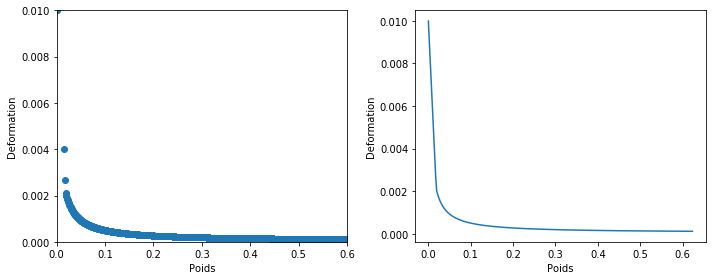

Avec un temps d'exécution de : 18.748s


In [20]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import time

N = 10000
alpha_seq = np.arange(0,N,1)
lb_ub = [(0.02, 1), (0, 0.99)] # bornes inférieurs et supérieures liées à nos contraintes

a_b_list = list()

start = time.time()
# Minimisation du critère agrégé pour chaque alpha
for alpha in alpha_seq:
    def f(x):
        return (x[0]**2 - x[1]**2) + alpha * (10**(-4) / (10**(-2) + x[0]**4 - x[1]**4))
    constraints = ({'type': 'ineq', 'fun': lambda x:  x[0] - x[1] - 0.01}) # Pour s'assurer que b-a <= -0.01
    prob = minimize(f, np.array([0.5,0.49]), constraints=constraints, bounds=lb_ub)
    a_b_list.append(prob.x)
end = time.time()

# Création et affichage des points (poids, déformation) optimaux
poids = list()
deform = list()
for a_b in a_b_list:
    poids.append(p(a_b))
    deform.append(d(a_b))

fig, ax = plt.subplots(1, 2, figsize=(10,4))
plt.setp(ax[0], xlim=(0, 0.6), ylim=(0, 0.01), xlabel="Poids", ylabel="Deformation")
plt.setp(ax[1], xlabel="Poids", ylabel="Deformation")
ax0 = ax[0].scatter(poids, deform) 
ax1 = ax[1].plot(poids, deform) 
plt.tight_layout()
print("Voici la frontière de pareto obtenue par méthode de pondération du critère aggrégé : ")
plt.show()
print("Avec un temps d'exécution de : {}s".format(round(end-start,4)))

Nous pouvons voir que cette méthode est plus longue (la plus longue des trois implémentées d'ailleurs). Ceci étant, nous pouvons voir que pour les "petites" déformations, le front de pareto est parfaitement approximé. Il est approximé seulement sur les "petites déformations" car dans notre code $\alpha$ varie entre $0$ et $10000$, alors qu'en théorie, il tend vers $+\infty$. Et lorsqu'$\alpha = 0$, le poids est totalement prédominant. Nous aurions donc une très bonne approximation en augmentant la taille de $N$, mais cela n'est pas gratuit en temps d'éxécution...

<p id="3.3" style="text-align:center">
    <B><font size="+1">Méthode Métaheuristique</font></B>
</p>
<p><br></p>

### Algorithme Genetique NGSA-II

Dans cet algorithme , une population de parents $P_{t}$ de taille N et une population d'enfants $Q_{t}$ de taille N sont assemblés pour former une population $R_{t} = P_{t} \cup Q_{t}$ . La population 2N est ensuite triée selon un critère de non dominance pour identifer les differents fronts $F_{1}$ , $F_{2}$ etc. Les meilleurs individus vont se retrouver dans le ou les premiers fronts. Une nouvelle population parent $P_{t+1}$ est formée en ajoutant les fronts au complet tant qu'ils ne depassent pas N. Si le nombre d'individus dans $P_{t+1}$ est inferieur à N, une procedure de crowding appliquée sur le premier front suivant non inclus dans $P_{t+1}$. Le but est d'inserer les $(N-P_{t+1})$ meilleurs individus qui manquent dans la population $P_{t+1}$.
Les individus de ce front sont utilisés pour calculer la distance de crowding entre deux solutions voisines. Une fois que les individus appartenant à la population $P_{t+1}$ ) sont identifiés, une
nouvelle population enfant $Q_{t+1}$ est créée par sélection, croisement et mutation.

<img SRC="schema_tri.png" width="500" height="400">

<p><br></p>

<img SRC="algorithme.png" width="450" height="350">

Voici la courbve de Pareto obtenue via la méthode métaheuristique : 


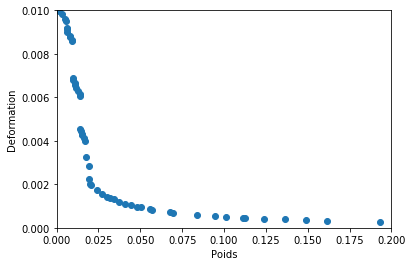

Avec un temps d'exécution de : 4.9977s


In [19]:
# !pip install platypus-opt # A décommenter pour l'installation du package platypus-opt
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from random import *
from platypus import NSGAII, Problem, Real
import time

def p(a_b):
    return a_b[0]**2 - a_b[1]**2
def d(a_b):
    return (1/10**4)/(1/10**2 + a_b[0]**4 - a_b[1]**4)

def schaffer(x):
    return [x[0]**2 - x[1]**2, (1/10**4)/(1/10**2 + x[0]**4 - x[1]**4) ],[x[1]- x[0] + 0.01]

start = time.time()
problem = Problem(2,2,1)
problem.types[:] = [Real(0.02, 1), Real(0,1)]
problem.constraints[:] = "<=0"
problem.function = schaffer

algorithm = NSGAII(problem)
algorithm.run(10000)
end = time.time()

plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
plt.xlim([0,0.2])
plt.ylim([0,0.01])
plt.xlabel("Poids")
plt.ylabel("Deformation")
print("Voici la courbve de Pareto obtenue via la méthode métaheuristique : ")
plt.show()
print("Avec un temps d'exécution de : {}s".format(round(end-start,4)))

Nous pouvons voir que cette méthode est moins longue que la précédente, et l'approximation du front de pareto est plus homogène, nous pouvons dire que cette approximation sera d'autant plus satisfaisante que N sera grand. Comparé à la deuxième méthode, il n'y a pas de relation de prépondérance entre le poids et la déformation ici, ce qui permet cette homogénéité d'approximation, pour en somme, un moindre coût en temps d'exécution.

<p><br></p>
<p id="3.3" style="text-align:center">
    <B><font size="+1">Conclusion</font></B>
</p>

Pour conclure, la méthode gloutonne paraît être une bonne technique d'approximation du front de pareto dans ce problème, mais cette méthode sera d'autant plus coûteuse que le nombre de variables augmentera.  


La deuxième méthode approxime de manière satisfaisante, mais avec un coût trop élevé (du moins avec le package **scipy**), cependant, elle reste préférable lors d'applications industrielles/métiers, du fait de sa meilleure approximation.  

Enfin, la dernière méthode (heuristique) se trouve être un bon "compromis" entre les deux précédentes, avec une approximation plus homogène pour un coût de temps d'éxécution plus faible.